<a href="https://colab.research.google.com/github/khanittha-phusopha/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-means

###Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y=make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

##Explore data

In [3]:
X.shape

(500, 2)

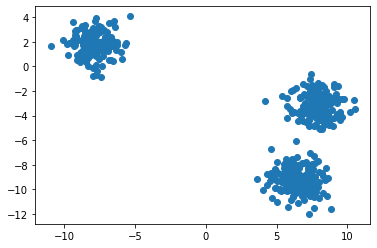

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

### Clustering

####Import

In [5]:
from sklearn.cluster import KMeans

####Define

In [6]:
kmeans = KMeans(n_clusters=2, random_state=6)

####Fit-Predict

In [7]:
y_clust = kmeans.fit_predict(X)

In [8]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

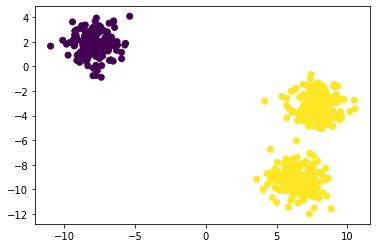

In [9]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

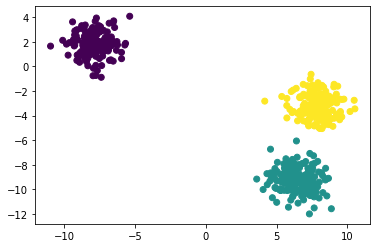

In [10]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

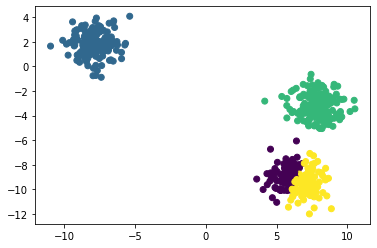

In [11]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

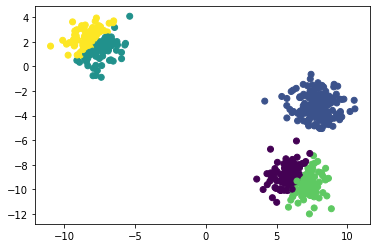

In [12]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

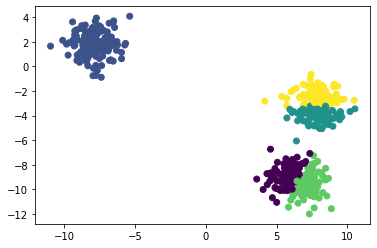

In [13]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init='random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

### Example Application(Color Quantization)

In [14]:
import cv2
import os

In [32]:
img = cv2.imread('/content/yinyin.jpg')

In [33]:
img.shape

(569, 320, 3)

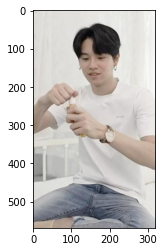

In [34]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

#### นับจำนวนสี

In [35]:
import numpy as np

In [36]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(17863, 3)

จัดกลุ่มสีให้เหลือ 16 สี

In [37]:
myquantize = KMeans(n_clusters=16, random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [38]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row

array([[225, 224, 220],
       [222, 221, 217],
       [218, 217, 213],
       ...,
       [191, 192, 194],
       [190, 191, 193],
       [188, 189, 191]], dtype=uint8)

In [39]:
final_color = myquantize.fit_predict(img_row)

#### ใช้ centorid เป็นตัวแทนของสี

In [40]:
centroid = myquantize.cluster_centers_

In [41]:
centroid

array([[231.44562042, 230.30010242, 226.23807898],
       [137.5483871 , 115.35954301, 101.40087366],
       [ 30.04004044,  27.55005056,  27.80505561],
       [192.40826587, 190.76527814, 188.46356751],
       [180.16840333, 157.31207241, 143.44384802],
       [ 77.44942325,  79.39995563,  89.19210293],
       [209.50030045, 206.97806679, 203.69958795],
       [102.31369398, 107.6311373 , 120.41796108],
       [200.82935455, 178.94120248, 164.30912909],
       [123.29534147, 127.46102819, 138.40569878],
       [159.79765886, 139.07451923, 125.66335702],
       [243.06409203, 243.03478499, 240.51369488],
       [147.17600897, 148.27200112, 152.39658072],
       [ 53.61936748,  51.77833753,  55.04785894],
       [168.87721324, 169.45977675, 171.74422633],
       [221.81742789, 220.07845712, 216.26905492]])

แทนสีลงไป

In [42]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
     for j in range(RGB_img.shape[1]):
          new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

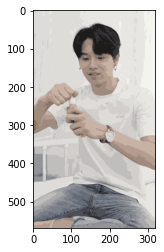

In [43]:
plt.imshow(new_img/255)

In [44]:
plt.imsave('img.jpg',new_img/255)

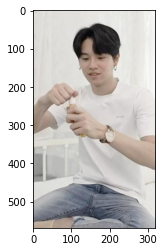

In [45]:
plt.imshow(RGB_img)